___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [56]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [57]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [58]:
print('''
Shape of x_train is {} 
Shape of x_test is {} 
Shape of y_train is {} 
Shape of y_train is {} 
'''.format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))


Shape of x_train is (60000, 28, 28) 
Shape of x_test is (10000, 28, 28) 
Shape of y_train is (60000,) 
Shape of y_train is (10000,) 



**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [59]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

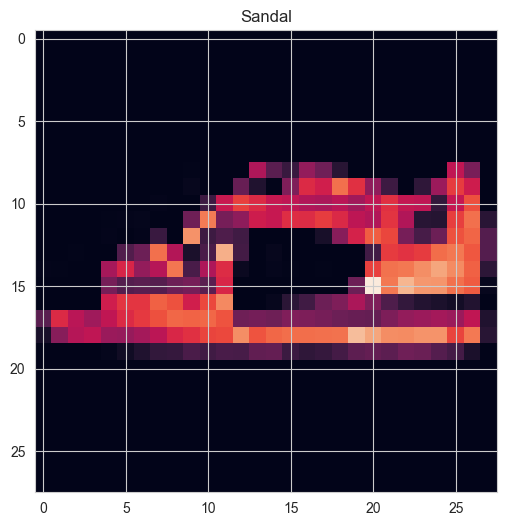

In [60]:
plt.imshow(x_train[13])
plt.title(classes[y_train[13]])
plt.show()

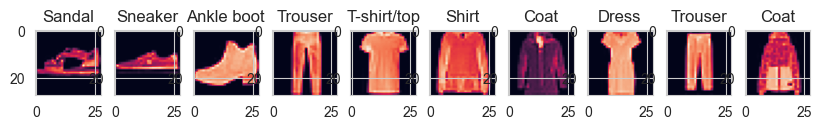

In [61]:
start , end = 13 , 23
for i in range(start, end):
    plt.subplot(1, end - start, i - start+1)
    plt.imshow(x_train[i])
    plt.title(classes[y_train[i]])

plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [62]:
print(
    '''
    Max Values Train : {}
    Min Values Train : {}

    '''.format(x_train.max(),x_train.min())
)


    Max Values Train : 255
    Min Values Train : 0

    


In [63]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [64]:
print(
    '''
    Max Values Train : {}
    Min Values Train : {}

    '''.format(x_train.max(),x_train.min())
)


    Max Values Train : 1.0
    Min Values Train : 0.0

    


**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [65]:
print('''
Shape of x_train is {} 
Shape of x_test is {} 

'''.format(x_train.shape, x_test.shape)
)


Shape of x_train is (60000, 28, 28) 
Shape of x_test is (10000, 28, 28) 




In [66]:
# Reshaping the training and testing data to match the expected input shape for a CNN.
# The original data is in a 3D format (number of samples, height, width),
# but CNNs require a 4D format (number of samples, height, width, channels).
# In this case, the data is reshaped to (number of samples, height, width, 1),
# where '1' indicates a single color channel (e.g., grayscale images).

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  # Reshaping training data
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)     # Reshaping testing data


In [67]:
print('''
Shape of x_train is {} 
Shape of x_test is {} 

'''.format(x_train.shape, x_test.shape)
)


Shape of x_train is (60000, 28, 28, 1) 
Shape of x_test is (10000, 28, 28, 1) 




**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [68]:
from tensorflow.keras.utils import to_categorical

In [69]:
print('''
Shape of x_train is {} 
Shape of x_test is {} 

'''.format(y_train[13], y_test[13])
)


Shape of x_train is 5 
Shape of x_test is 3 




In [70]:
# Performing one-hot encoding on the class labels for both training and testing datasets.
# In one-hot encoding, each class label is represented as a binary vector.
# Each element in the vector corresponds to a class, and only one element is '1'
# to indicate the class while all others are '0'.

y_train = to_categorical(y_train, num_classes=10)  # One-hot encoding for training labels
y_test = to_categorical(y_test, num_classes=10)    # One-hot encoding for testing labels


In [71]:
print('''
Shape of x_train is {} 
Shape of x_test is {} 

'''.format(y_train[13], y_test[13])
)


Shape of x_train is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 
Shape of x_test is [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 




# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [73]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # stride =(1,1) is the default value

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 4732)              0         
                                                                 
 dense_19 (Dense)            (None, 128)               605824    
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                      

In [75]:
########## Trying ###########
# Add dropout with a dropout rate of 0.3
# Adding a extra hidden layers to see the preformanc of it 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model1 = Sequential()

# Convolutional Layer
model1.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())

# Fully Connected Layers
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.3))  
model1.add(Dense(64, activation='relu')) # Added to see the results
model1.add(Dropout(0.3))  

# Output Layer
model1.add(Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [76]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 4732)              0         
                                                                 
 dense_21 (Dense)            (None, 128)               605824    
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                      

In [77]:

########## Trying ###########
# changed the fillter size and added a one more layer in Conv
model2 = Sequential()

# First Convolutional Layer
model2.add(Conv2D(64, kernel_size=(2, 2), padding='same', activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))

# Second Convolutional Layer 
model2.add(Conv2D(32, kernel_size=(2, 2), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))

# Output Layer
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [78]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 7, 7, 32)         

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [79]:
from tensorflow.keras.callbacks import EarlyStopping

In [80]:
early_stop = EarlyStopping(monitor='val_loss', mode="max",patience=6 ,restore_best_weights = True)


In [81]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
)

Epoch 1/30
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4990 - accuracy: 0.8286 - val_loss: 0.3465 - val_accuracy: 0.8773
Epoch 2/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3570 - accuracy: 0.8770 - val_loss: 0.3226 - val_accuracy: 0.8882
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3306 - accuracy: 0.8853 - val_loss: 0.3128 - val_accuracy: 0.8902
Epoch 4/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3144 - accuracy: 0.8924 - val_loss: 0.2956 - val_accuracy: 0.8943
Epoch 5/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3049 - accuracy: 0.8944 - val_loss: 0.3136 - val_accuracy: 0.8881
Epoch 6/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3004 - accuracy: 0.8965 - val_loss: 0.3046 - val_accuracy: 0.8941
Epoch 7/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2939 - accuracy: 0.8994 - val_loss: 0.3083 - val_ac

In [82]:
model1.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
)

Epoch 1/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5033 - accuracy: 0.8262 - val_loss: 0.3579 - val_accuracy: 0.8774
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3597 - accuracy: 0.8795 - val_loss: 0.3242 - val_accuracy: 0.8865
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3370 - accuracy: 0.8861 - val_loss: 0.3308 - val_accuracy: 0.8852
Epoch 4/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3251 - accuracy: 0.8915 - val_loss: 0.3218 - val_accuracy: 0.8918
Epoch 5/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3171 - accuracy: 0.8935 - val_loss: 0.3352 - val_accuracy: 0.8926
Epoch 6/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3176 - accuracy: 0.8964 - val_loss: 0.3401 - val_accuracy: 0.8938
Epoch 7/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3165 - accuracy: 0.8980 - val_loss: 0.3332 - val_ac

In [83]:
model2.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
)

Epoch 1/30
1875/1875 [==============================] - 24s 12ms/step - loss: 0.5945 - accuracy: 0.7843 - val_loss: 0.3939 - val_accuracy: 0.8588
Epoch 2/30
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4152 - accuracy: 0.8551 - val_loss: 0.3401 - val_accuracy: 0.8791
Epoch 3/30
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3840 - accuracy: 0.8658 - val_loss: 0.3423 - val_accuracy: 0.8862
Epoch 4/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3754 - accuracy: 0.8702 - val_loss: 0.3316 - val_accuracy: 0.8901
Epoch 5/30
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3730 - accuracy: 0.8719 - val_loss: 0.3534 - val_accuracy: 0.8880
Epoch 6/30
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3660 - accuracy: 0.8754 - val_loss: 0.6007 - val_accuracy: 0.8660
Epoch 7/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3677 - accuracy: 0.8761 - val_loss: 0.4506 -

**TASK 7: Plot values of metrics you used in your model.**

In [84]:
loss_df = pd.DataFrame(model.history.history)
loss_df1 = pd.DataFrame(model1.history.history)
loss_df2 = pd.DataFrame(model2.history.history)

In [85]:

# Vanilla Model (the least requirements)
print('--------- Vanilla Model (the least requirements) ---------')
print(loss_df.head())

# Model with 2 Hidden Layers
print('--------- Model with 2 Hidden Layers ---------')
print(loss_df1.head())

# Model with 2 Convolutional Layers
print('--------- Model with 2 Convolutional Layers ---------')
print(loss_df2.head())


--------- Vanilla Model (the least requirements) ---------
   loss  accuracy  val_loss  val_accuracy
0 0.499     0.829     0.346         0.877
1 0.357     0.877     0.323         0.888
2 0.331     0.885     0.313         0.890
3 0.314     0.892     0.296         0.894
4 0.305     0.894     0.314         0.888
--------- Model with 2 Hidden Layers ---------
   loss  accuracy  val_loss  val_accuracy
0 0.503     0.826     0.358         0.877
1 0.360     0.879     0.324         0.887
2 0.337     0.886     0.331         0.885
3 0.325     0.891     0.322         0.892
4 0.317     0.894     0.335         0.893
--------- Model with 2 Convolutional Layers ---------
   loss  accuracy  val_loss  val_accuracy
0 0.594     0.784     0.394         0.859
1 0.415     0.855     0.340         0.879
2 0.384     0.866     0.342         0.886
3 0.375     0.870     0.332         0.890
4 0.373     0.872     0.353         0.888


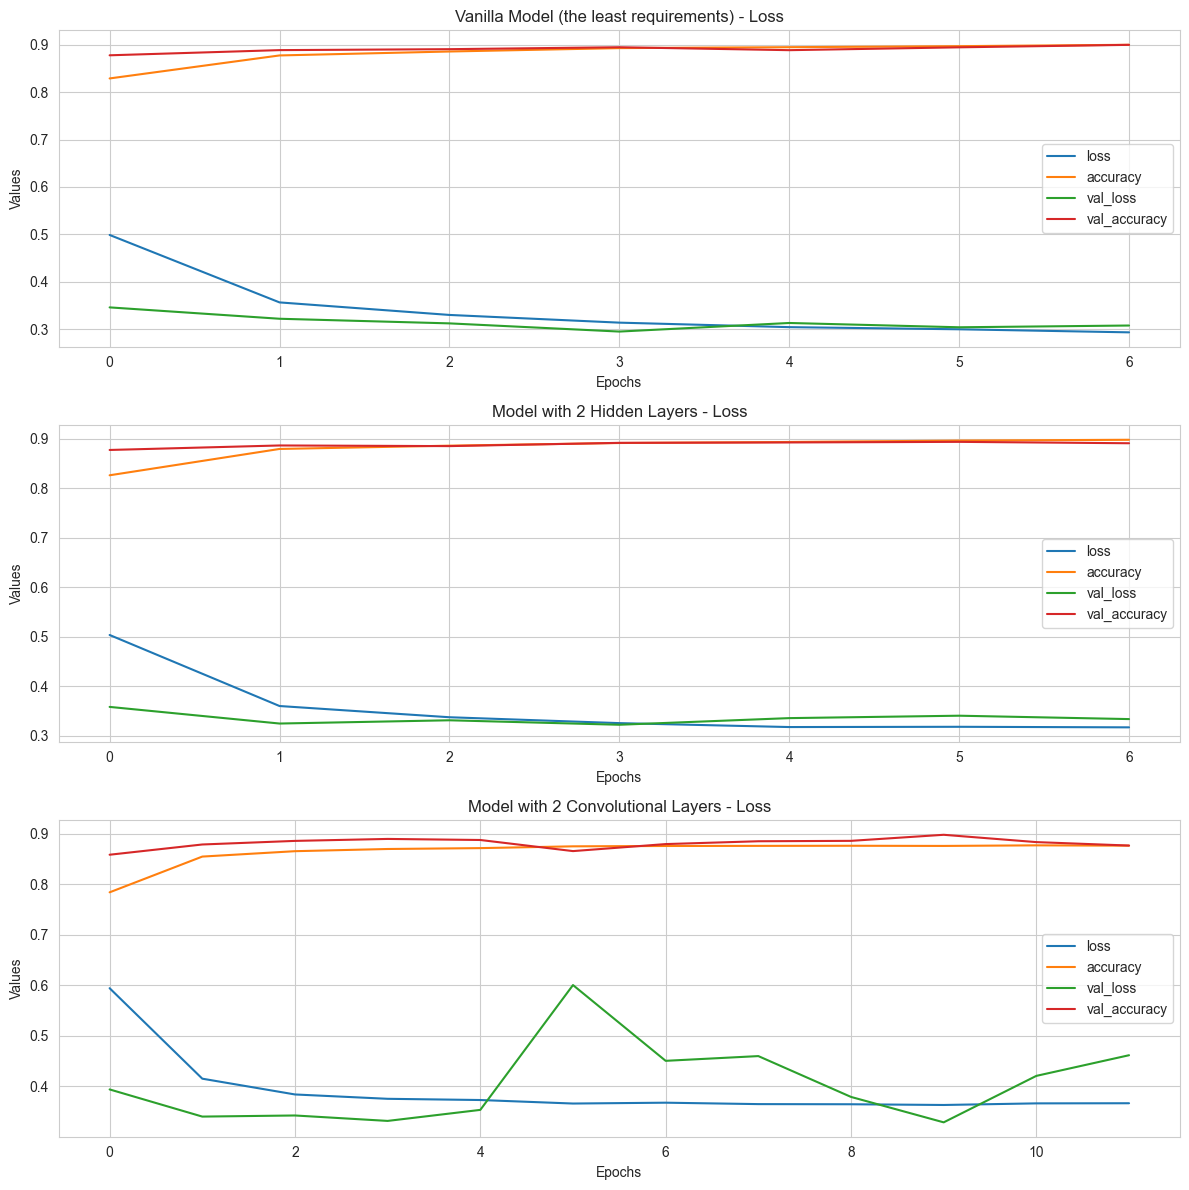

In [86]:
# Create a list of dataframes and their corresponding names
model_data = [(loss_df, 'Vanilla Model (the least requirements)'),
              (loss_df1, 'Model with 2 Hidden Layers'),
              (loss_df2, 'Model with 2 Convolutional Layers')]

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

for i, (model_df, model_name) in enumerate(model_data):
    model_df.plot(ax=axes[i])
    axes[i].set_title(f'{model_name} - Loss')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Values')

# Adjust layout
plt.tight_layout()
plt.show()


# In the figure below i changed the pation for 15 and got more epoches and we can see the change in loss in the valdation

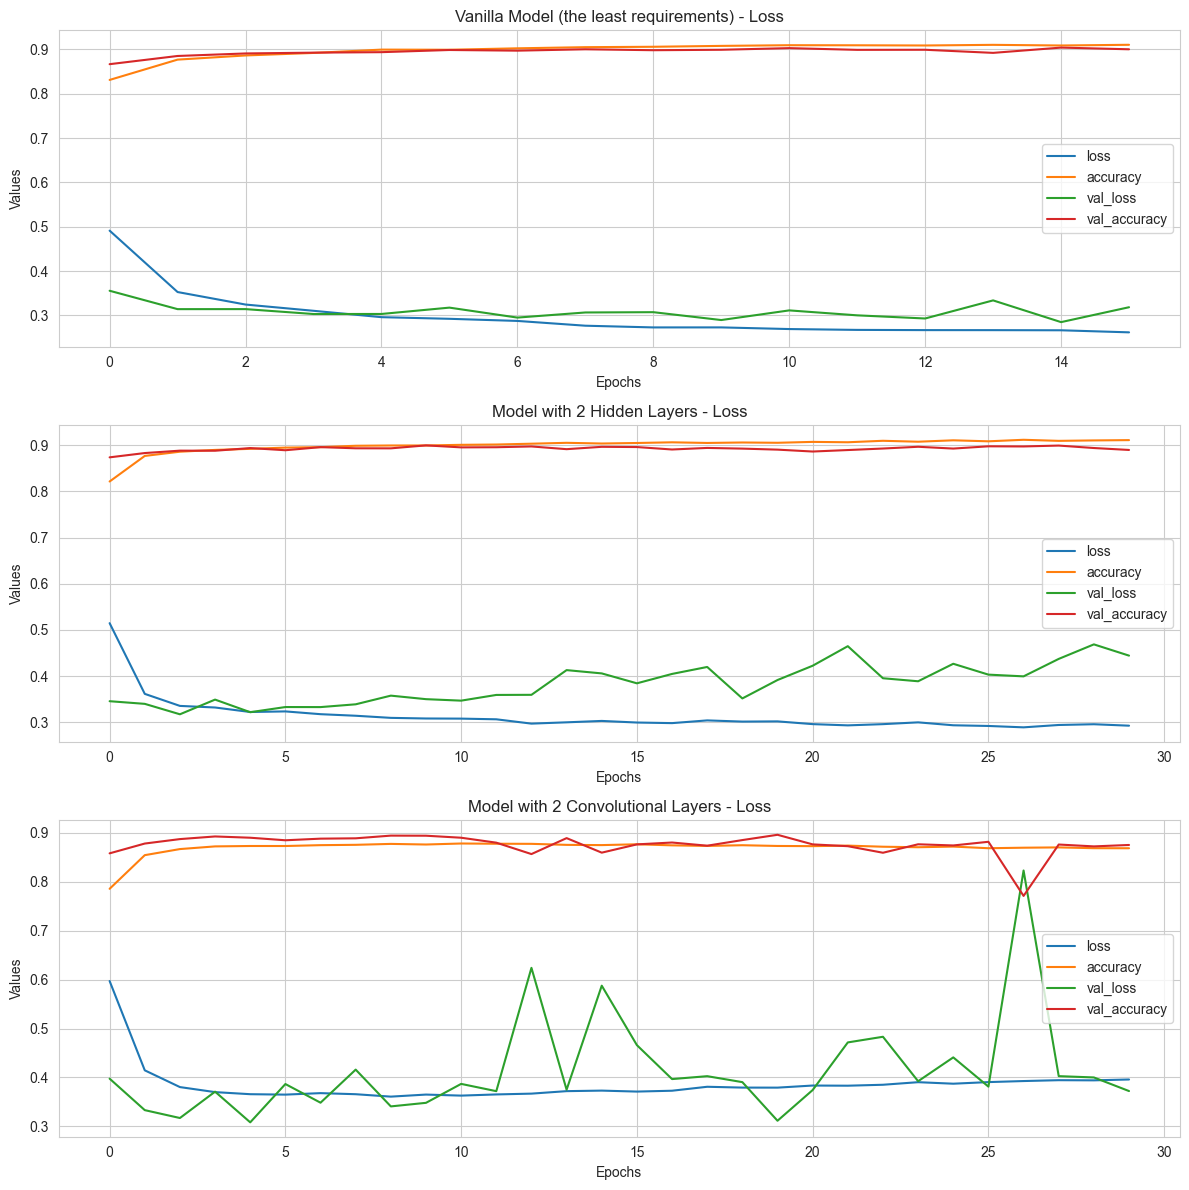

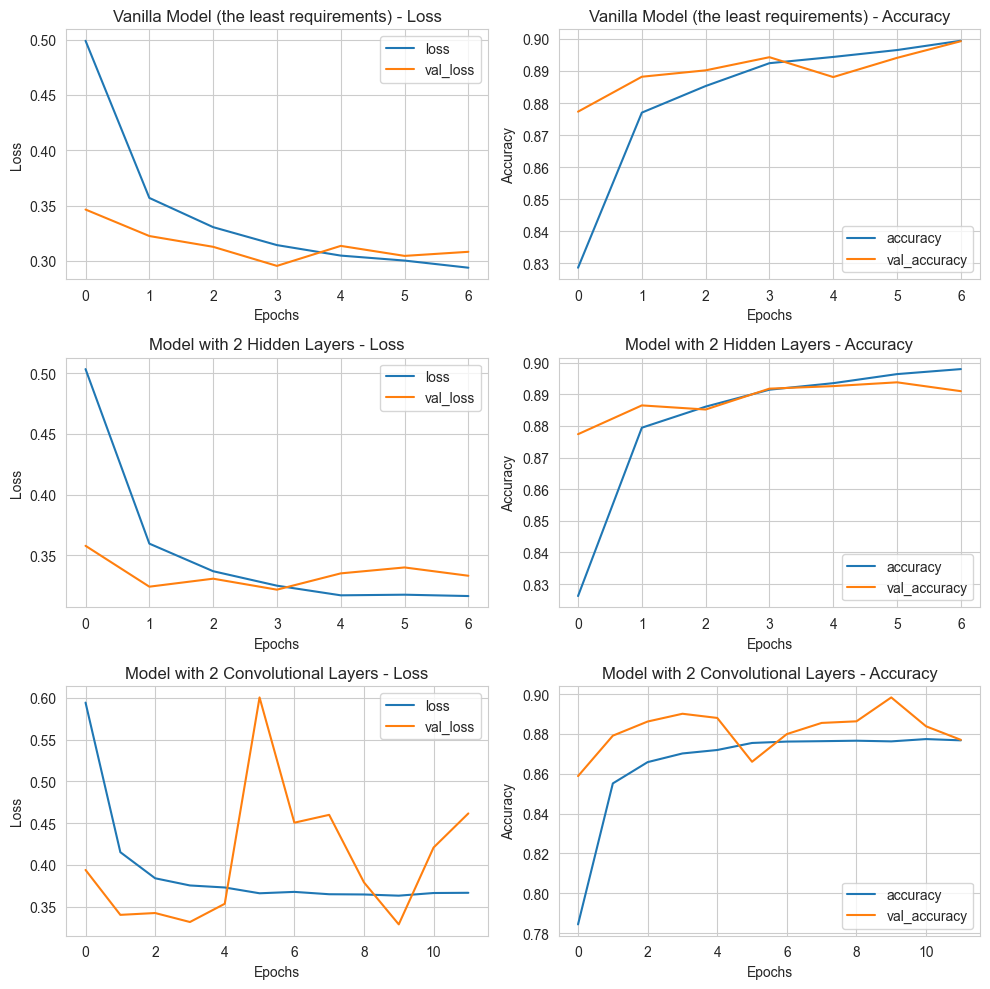

In [87]:
# Create subplots for each model
fig, axes = plt.subplots(len(model_data), 2, figsize=(10, 10))
for i, (model_df, model_name) in enumerate(model_data):
    # Plot loss
    model_df[['loss', 'val_loss']].plot(ax=axes[i, 0])
    axes[i, 0].set_title(f'{model_name} - Loss')
    axes[i, 0].set_xlabel('Epochs')
    axes[i, 0].set_ylabel('Loss')

    # Plot accuracy
    model_df[['accuracy', 'val_accuracy']].plot(ax=axes[i, 1])
    axes[i, 1].set_title(f'{model_name} - Accuracy')
    axes[i, 1].set_xlabel('Epochs')
    axes[i, 1].set_ylabel('Accuracy')

# Adjust layout
plt.tight_layout()
plt.show()


# In the figure below i changed the pation for 15 and got more epoches and we can see the change in loss in the valdation

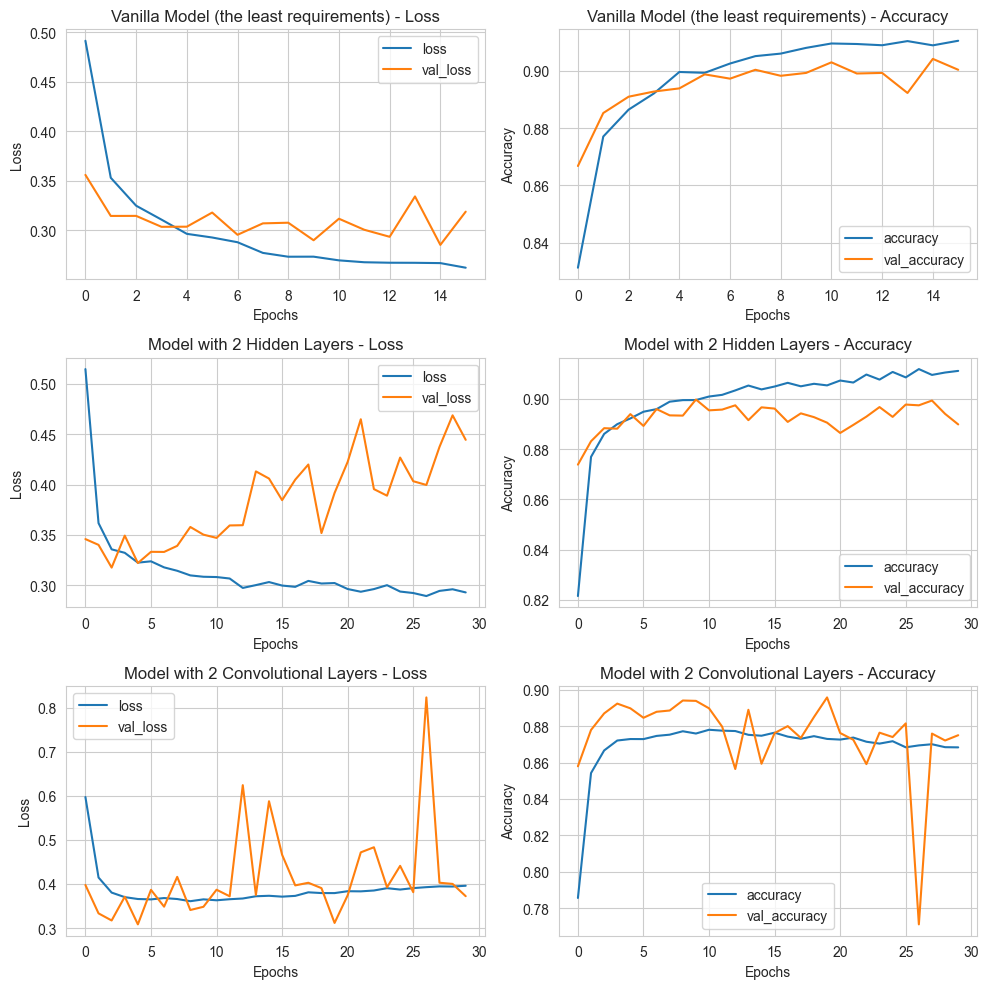

### As conclution 
 - We can see for the first model that we have some overfitting for when we check the curve if the accuracy and compare between the train and Val
 - the second one is the best one regarding the comparing the results 
 - also the third one is good has regarding the curv of the figure 

<Axes: >

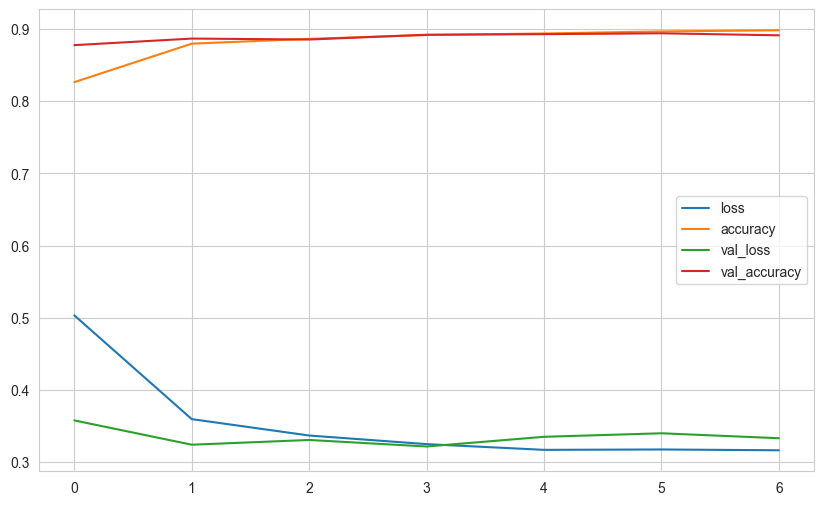

In [88]:
loss_df1.plot()

<Axes: >

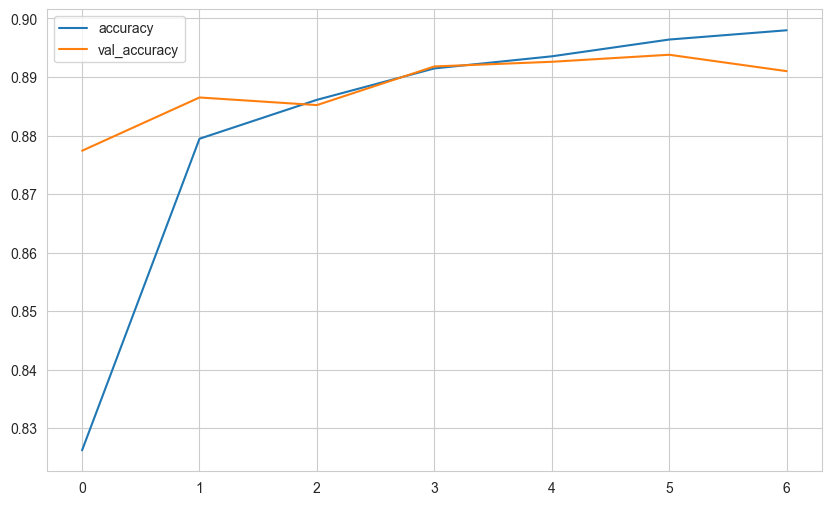

In [89]:
loss_df1[['accuracy','val_accuracy']].plot()

<Axes: >

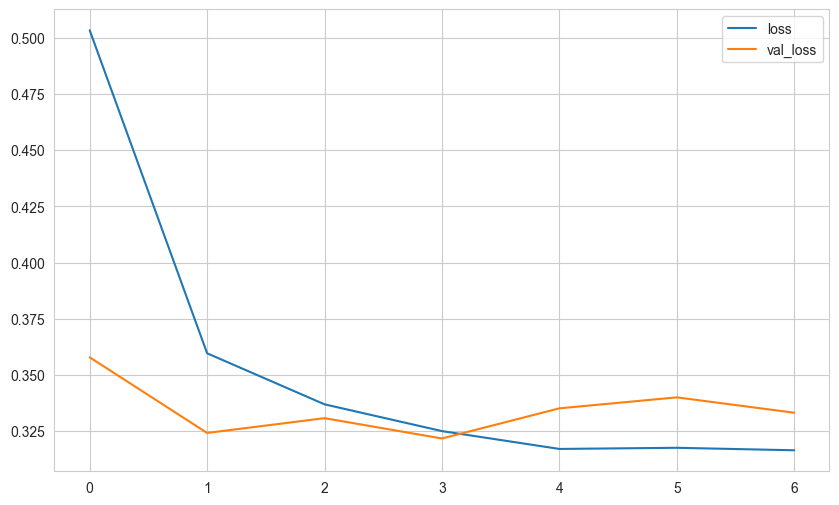

In [90]:
loss_df1[['loss','val_loss']].plot()


# Neural Network Regularization Experimentation

## Overview

In this notebook, I am experimenting with various regularization techniques to enhance the performance and generalization of a neural network model. Regularization is a critical tool in combating overfitting and improving model robustness. I am testing the following regularization methods:

### L1 Regularization (Lasso):
- Applied to both convolutional and fully connected layers.
- Encourages sparsity in weight parameters by adding a penalty based on the absolute values of the weights.
- Controlled by a regularization strength parameter.

### L2 Regularization (Ridge):
- Applied to both convolutional and fully connected layers.
- Encourages smaller weight values by adding a penalty based on the square of the weights.
- Controlled by a regularization strength parameter.

### Elastic Net Regularization:
- A combination of L1 and L2 regularization.
- Applied to both convolutional and fully connected layers.
- Balances between feature selection and weight shrinkage by adding penalties based on both absolute values and squared values of the weights.
- Controlled by L1 and L2 regularization strength parameters.

## Objectives

The goal of this experimentation is to observe how these regularization techniques impact the model's performance. By adding these regularizers to the layers of a neural network, I aim to:

- Assess the effect on training and validation accuracy.
- Determine the impact on the model's ability to generalize to unseen data.
- Observe the differences in model weights when compared to models without regularization.
- Identify which regularization method works best for this specific task.



In [91]:
from tensorflow.keras import regularizers

model_l1 = Sequential()

# Convolutional Layer with L1 regularization
model_l1.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1), kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_l1.add(MaxPooling2D(pool_size=(2, 2)))
model_l1.add(Flatten())

# Fully Connected Layers with L1 regularization
model_l1.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_l1.add(Dropout(0.3))
model_l1.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))  # Added to see the results
model_l1.add(Dropout(0.3))

# Output Layer
model_l1.add(Dense(10, activation='softmax'))

model_l1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [92]:
model_l1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 4732)              0         
                                                                 
 dense_26 (Dense)            (None, 128)               605824    
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                     

In [93]:
from tensorflow.keras import regularizers

model_l2 = Sequential()

# Convolutional Layer with L2 regularization
model_l2.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1), 
                   kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_l2.add(MaxPooling2D(pool_size=(2, 2)))
model_l2.add(Flatten())

# Fully Connected Layers with L2 regularization
model_l2.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_l2.add(Dropout(0.3))
model_l2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))  # Added to see the results
model_l2.add(Dropout(0.3))

# Output Layer
model_l2.add(Dense(10, activation='softmax'))

model_l2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [94]:
model_l2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 4732)              0         
                                                                 
 dense_29 (Dense)            (None, 128)               605824    
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                     

In [95]:
from tensorflow.keras import regularizers

model_elastic_net = Sequential()

# Convolutional Layer with Elastic Net regularization
model_elastic_net.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1), 
                   kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01),
                   bias_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
model_elastic_net.add(MaxPooling2D(pool_size=(2, 2)))
model_elastic_net.add(Flatten())

# Fully Connected Layers with Elastic Net regularization
model_elastic_net.add(Dense(128, activation='relu', 
                   kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01),
                   bias_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
model_elastic_net.add(Dropout(0.3))
model_elastic_net.add(Dense(64, activation='relu', 
                   kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01),
                   bias_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))  # Added to see the results
model_elastic_net.add(Dropout(0.3))

# Output Layer
model_elastic_net.add(Dense(10, activation='softmax'))

model_elastic_net.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [96]:
model_elastic_net.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 4732)              0         
                                                                 
 dense_32 (Dense)            (None, 128)               605824    
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                     

In [97]:
model_l1.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=[early_stop])

Epoch 1/30
1875/1875 [==============================] - 14s 7ms/step - loss: 5.4515 - accuracy: 0.4105 - val_loss: 4.3830 - val_accuracy: 0.6622
Epoch 2/30
1875/1875 [==============================] - 13s 7ms/step - loss: 4.5809 - accuracy: 0.5117 - val_loss: 4.2612 - val_accuracy: 0.6914
Epoch 3/30
1875/1875 [==============================] - 13s 7ms/step - loss: 4.5260 - accuracy: 0.5428 - val_loss: 4.3027 - val_accuracy: 0.6798
Epoch 4/30
1875/1875 [==============================] - 13s 7ms/step - loss: 4.4958 - accuracy: 0.5540 - val_loss: 4.2011 - val_accuracy: 0.7210
Epoch 5/30
1875/1875 [==============================] - 13s 7ms/step - loss: 4.4846 - accuracy: 0.5618 - val_loss: 4.2154 - val_accuracy: 0.7052
Epoch 6/30
1875/1875 [==============================] - 13s 7ms/step - loss: 4.4661 - accuracy: 0.5681 - val_loss: 4.2769 - val_accuracy: 0.6670
Epoch 7/30
1875/1875 [==============================] - 13s 7ms/step - loss: 4.4253 - accuracy: 0.5866 - val_loss: 4.2202 - val_ac

In [98]:
model_l2.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=[early_stop])

Epoch 1/30
1875/1875 [==============================] - 13s 7ms/step - loss: 1.0700 - accuracy: 0.7486 - val_loss: 0.9256 - val_accuracy: 0.7426
Epoch 2/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.8024 - accuracy: 0.7918 - val_loss: 0.7241 - val_accuracy: 0.8108
Epoch 3/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.7621 - accuracy: 0.8015 - val_loss: 0.6812 - val_accuracy: 0.8239
Epoch 4/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.7346 - accuracy: 0.8118 - val_loss: 0.7246 - val_accuracy: 0.8085
Epoch 5/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.7207 - accuracy: 0.8166 - val_loss: 0.6600 - val_accuracy: 0.8327
Epoch 6/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7091 - accuracy: 0.8212 - val_loss: 0.6842 - val_accuracy: 0.8111
Epoch 7/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.6987 - accuracy: 0.8227 - val_loss: 0.6493 - val_ac

In [99]:
model_elastic_net.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=[early_stop])

Epoch 1/30
1875/1875 [==============================] - 14s 7ms/step - loss: 6.0131 - accuracy: 0.1034 - val_loss: 5.3751 - val_accuracy: 0.1000
Epoch 2/30
1875/1875 [==============================] - 13s 7ms/step - loss: 5.3751 - accuracy: 0.0969 - val_loss: 5.3749 - val_accuracy: 0.1000
Epoch 3/30
1875/1875 [==============================] - 13s 7ms/step - loss: 5.3751 - accuracy: 0.0978 - val_loss: 5.3750 - val_accuracy: 0.1000
Epoch 4/30
1875/1875 [==============================] - 15s 8ms/step - loss: 5.3751 - accuracy: 0.1001 - val_loss: 5.3749 - val_accuracy: 0.1000
Epoch 5/30
1875/1875 [==============================] - 13s 7ms/step - loss: 5.3750 - accuracy: 0.0980 - val_loss: 5.3748 - val_accuracy: 0.1000
Epoch 6/30
1875/1875 [==============================] - 14s 8ms/step - loss: 5.3751 - accuracy: 0.1004 - val_loss: 5.3753 - val_accuracy: 0.1000
Epoch 7/30
1875/1875 [==============================] - 14s 8ms/step - loss: 5.3751 - accuracy: 0.0964 - val_loss: 5.3747 - val_ac

In [107]:
loss_df_L1 = pd.DataFrame(model_l1.history.history)
loss_df_L2 = pd.DataFrame(model_l2.history.history)
loss_df_elastic = pd.DataFrame(model_elastic_net.history.history)

In [108]:
# Model with L1 Regularization (2 Hidden Layers)
print('--------- Model with L1 Regularization (2 Hidden Layers) ---------')
print(loss_df_L1.head())

# Model with L2 Regularization (2 Hidden Layers)
print('--------- Model with L2 Regularization (2 Hidden Layers) ---------')
print(loss_df_L2.head())

# Model with Elastic Net Regularization (2 Hidden Layers)
print('--------- Model with Elastic Net Regularization (2 Hidden Layers) ---------')
print(loss_df_elastic.head())


--------- Model with L1 Regularization (2 Hidden Layers) ---------
   loss  accuracy  val_loss  val_accuracy
0 5.451     0.411     4.383         0.662
1 4.581     0.512     4.261         0.691
2 4.526     0.543     4.303         0.680
3 4.496     0.554     4.201         0.721
4 4.485     0.562     4.215         0.705
--------- Model with L2 Regularization (2 Hidden Layers) ---------
   loss  accuracy  val_loss  val_accuracy
0 1.070     0.749     0.926         0.743
1 0.802     0.792     0.724         0.811
2 0.762     0.802     0.681         0.824
3 0.735     0.812     0.725         0.808
4 0.721     0.817     0.660         0.833
--------- Model with Elastic Net Regularization (2 Hidden Layers) ---------
   loss  accuracy  val_loss  val_accuracy
0 6.013     0.103     5.375         0.100
1 5.375     0.097     5.375         0.100
2 5.375     0.098     5.375         0.100
3 5.375     0.100     5.375         0.100
4 5.375     0.098     5.375         0.100


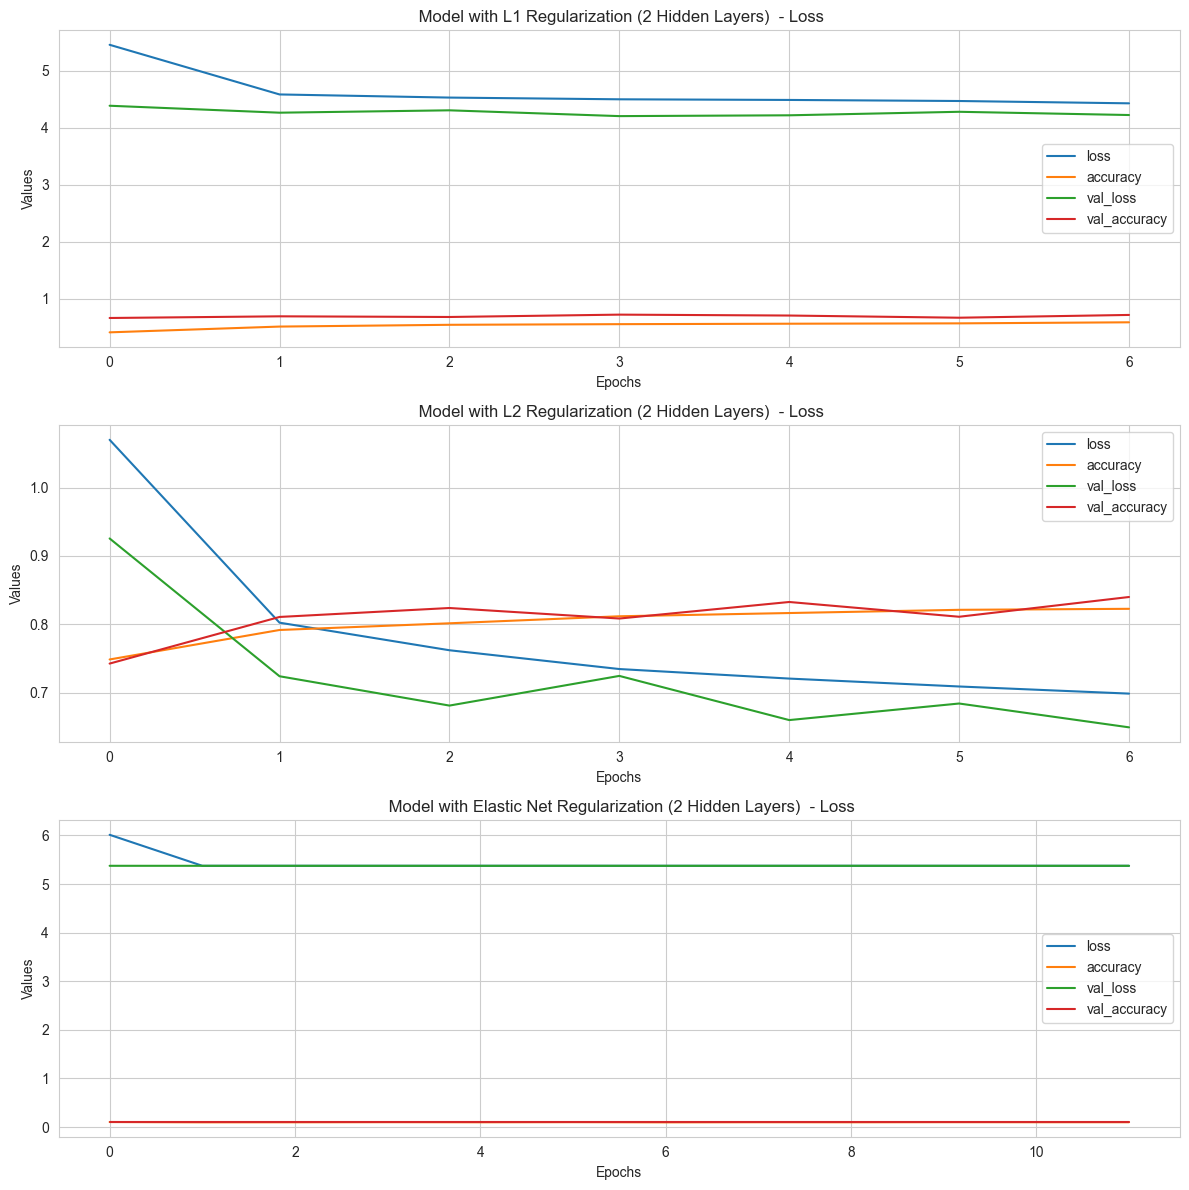

In [109]:
# Create a list of dataframes and their corresponding names
model_data = [(loss_df_L1, ' Model with L1 Regularization (2 Hidden Layers) '),
              (loss_df_L2, ' Model with L2 Regularization (2 Hidden Layers) '),
              (loss_df_elastic, ' Model with Elastic Net Regularization (2 Hidden Layers) ')]

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

for i, (model_df, model_name) in enumerate(model_data):
    model_df.plot(ax=axes[i])
    axes[i].set_title(f'{model_name} - Loss')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Values')

# Adjust layout
plt.tight_layout()
plt.show()


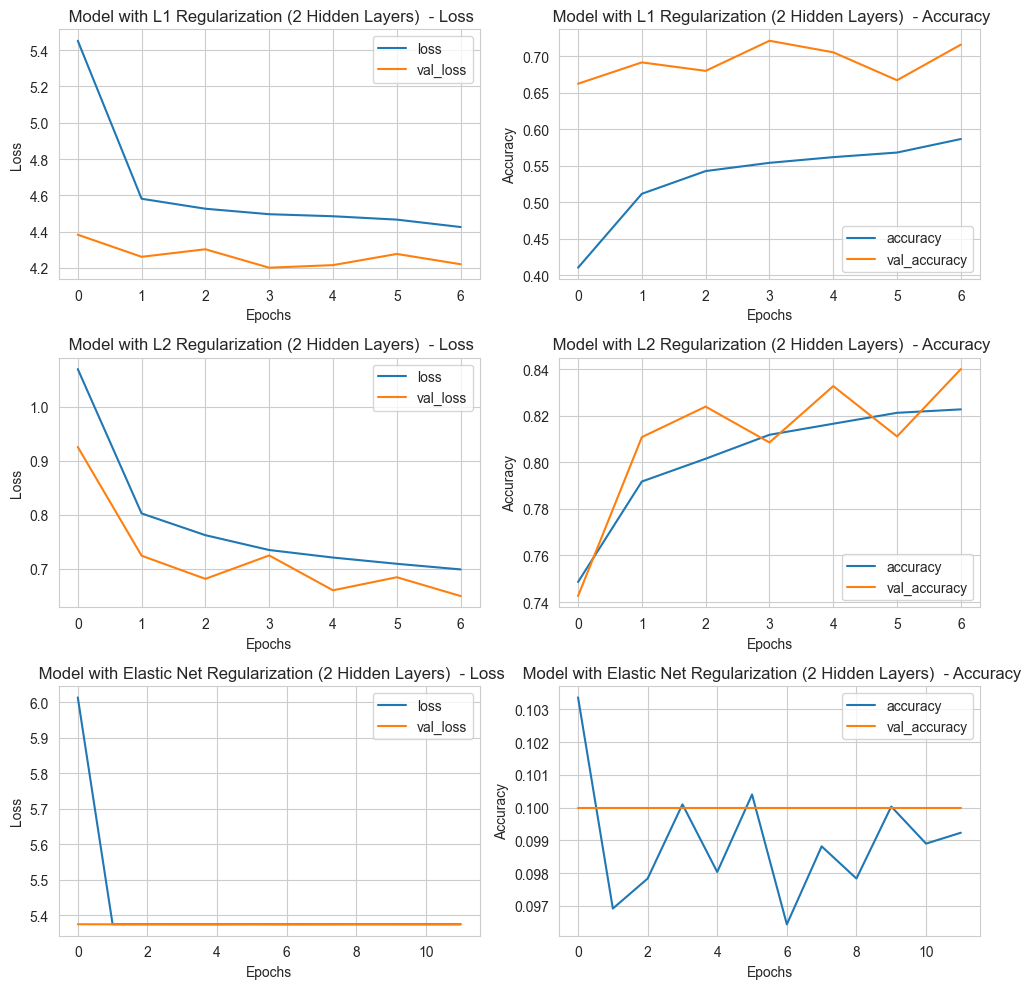

In [110]:
fig, axes = plt.subplots(len(model_data), 2, figsize=(10, 10))
for i, (model_df, model_name) in enumerate(model_data):
    # Plot loss
    model_df[['loss', 'val_loss']].plot(ax=axes[i, 0])
    axes[i, 0].set_title(f'{model_name} - Loss')
    axes[i, 0].set_xlabel('Epochs')
    axes[i, 0].set_ylabel('Loss')

    # Plot accuracy
    model_df[['accuracy', 'val_accuracy']].plot(ax=axes[i, 1])
    axes[i, 1].set_title(f'{model_name} - Accuracy')
    axes[i, 1].set_xlabel('Epochs')
    axes[i, 1].set_ylabel('Accuracy')

# Adjust layout
plt.tight_layout()
plt.show()

    The results indicate that L2 regularization was the most effective among the three techniques, resulting in better training and validation performance. However, L1 regularization and Elastic Net regularization did not yield satisfactory results for this specific task.

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [100]:
########## Trying function ##########
# from sklearn.metrics import classification_report

# def evaluate_model(model, x_train, y_train, x_test, y_test, classes):
#     test_loss, test_accuracy = model.evaluate(x_test, y_test)
#     print(f"Test Accuracy: {test_accuracy}")
#     y_pred_test = model.predict(x_test)

#     # Convert one-hot encoded predictions back to class labels for test data
#     y_pred_labels_test = np.argmax(y_pred_test, axis=1)
#     y_test_labels = np.argmax(y_test, axis=1)

#     # Generate classification report for test data
#     test_classification_rep = classification_report(y_test_labels, y_pred_labels_test, target_names=classes)
#     print("Test Classification Report:")
#     print(test_classification_rep)

#     y_pred_train = model.predict(x_train)
#     # Convert one-hot encoded predictions back to class labels for test data
#     y_pred_labels_train = np.argmax(y_pred_train, axis=1)
#     y_train_labels = np.argmax(y_train, axis=1)

#     # Generate classification report for train data
#     train_classification_rep = classification_report(y_train_labels, y_pred_labels_train, target_names=classes)
#     print("Train Classification Report:")
#     print(train_classification_rep)
#     # Generate confusion matrix for test data
#     test_confusion = confusion_matrix(y_test_labels, y_pred_labels_test)
#     print("Test Confusion Matrix:")

#     # Plot the confusion matrix for test data
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(test_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
#     plt.xlabel('Predicted')
#     plt.ylabel('True')
#     plt.title('Test Confusion Matrix')
#     plt.show()

#     # Generate confusion matrix for train data
#     train_confusion = confusion_matrix(y_train_labels, y_pred_labels_train)
#     print("Train Confusion Matrix:")

#     # Plot the confusion matrix for train data
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(train_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
#     plt.xlabel('Predicted')
#     plt.ylabel('True')
#     plt.title('Train Confusion Matrix')
#     plt.show()
# # Usage format 
# # evaluate_model(model1, x_train, y_train, x_test, y_test, classes)



In [101]:
from sklearn.metrics import classification_report, confusion_matrix

# Define a class called ImageClassifier
class ImageClassifier:
    def __init__(self, model, x_train, y_train, x_test, y_test, classes):
        # Constructor to initialize the class with model, training and testing data, and class labels
        self.model = model          # The neural network model
        self.x_train = x_train      # Training data features
        self.y_train = y_train      # Training data labels
        self.x_test = x_test        # Testing data features
        self.y_test = y_test        # Testing data labels
        self.classes = classes      # List of class labels

    def get_predicted_results(self, dataset):
        # Method to get predicted results for a specified dataset (train or test)
        if dataset == 'train':
            y_pred = self.model.predict(self.x_train)  # Predictions on the training data
            y_true = self.y_train                     # True labels of the training data
        elif dataset == 'test':
            y_pred = self.model.predict(self.x_test)   # Predictions on the testing data
            y_true = self.y_test                      # True labels of the testing data
        else:
            raise ValueError("Dataset must be 'train' or 'test'.")  # Raise an error for invalid dataset

        # Convert numerical predictions and true labels to class labels
        y_pred_labels = [self.classes[i] for i in np.argmax(y_pred, axis=1)]
        y_true_labels = [self.classes[i] for i in np.argmax(y_true, axis=1)]

        return y_pred_labels, y_true_labels

    def show_results(self, dataset):
        # Method to display the classification report for a specified dataset (train or test)
        y_pred_labels, y_true_labels = self.get_predicted_results(dataset)

        print(f"{dataset.capitalize()} Classification Report:")
        print(classification_report(y_true_labels, y_pred_labels, target_names=self.classes))

    def plot_confusion_matrix(self, dataset):
        # Method to plot the confusion matrix for a specified dataset (train or test)
        y_pred_labels, y_true_labels = self.get_predicted_results(dataset)

        # Generate the confusion matrix
        confusion = confusion_matrix(y_true_labels, y_pred_labels)

        # Plot the confusion matrix as a heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=self.classes, yticklabels=self.classes)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'{dataset.capitalize()} Confusion Matrix')
        plt.show()

############ Usage of the function inside the class ############
# # Create an instance of the ImageClassifier class with your model and data
# image_classifier = ImageClassifier(model, x_train, y_train, x_test, y_test, classes)

# # Use the class methods to get predicted results, display classification reports, and plot confusion matrices
# train_pred, train_true = image_classifier.get_predicted_results('train')  # Get predicted results for the training data
# test_pred, test_true = image_classifier.get_predicted_results('test')    # Get predicted results for the testing data

# image_classifier.show_results('train')  # Display the classification report for the training data
# image_classifier.show_results('test')   # Display the classification report for the testing data

# image_classifier.plot_confusion_matrix('train')  # Plot the confusion matrix for the training data
# image_classifier.plot_confusion_matrix('test')   # Plot the confusion matrix for the testing data


In [102]:
image_classifier = ImageClassifier(model1, x_train, y_train, x_test, y_test, classes) # Create an instance of the ImageClassifier class with your model and data

1875/1875 [==============================] - 4s 2ms/step


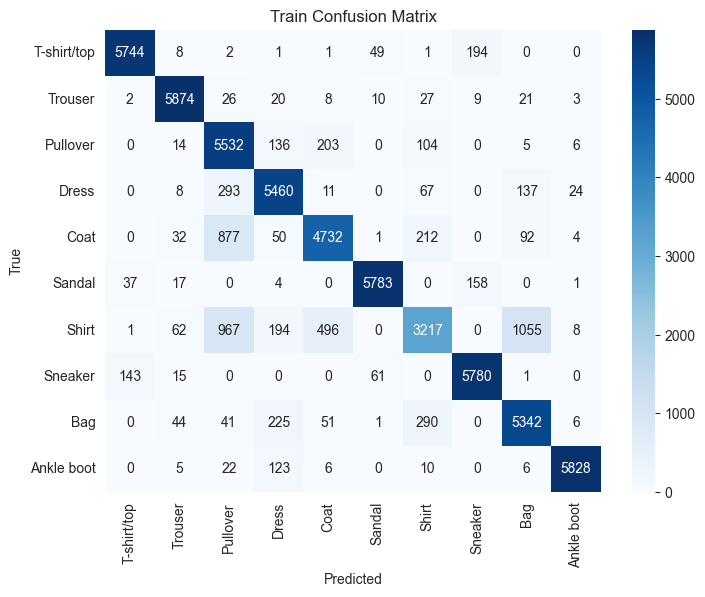

1875/1875 [==============================] - 4s 2ms/step
Train Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.97      0.96      0.96      6000
     Trouser       0.97      0.98      0.97      6000
    Pullover       0.71      0.92      0.80      6000
       Dress       0.88      0.91      0.89      6000
        Coat       0.86      0.79      0.82      6000
      Sandal       0.98      0.96      0.97      6000
       Shirt       0.82      0.54      0.65      6000
     Sneaker       0.94      0.96      0.95      6000
         Bag       0.80      0.89      0.84      6000
  Ankle boot       0.99      0.97      0.98      6000

    accuracy                           0.89     60000
   macro avg       0.89      0.89      0.89     60000
weighted avg       0.89      0.89      0.89     60000



In [112]:
image_classifier.plot_confusion_matrix('train')
image_classifier.show_results('train')


313/313 [==============================] - 1s 2ms/step


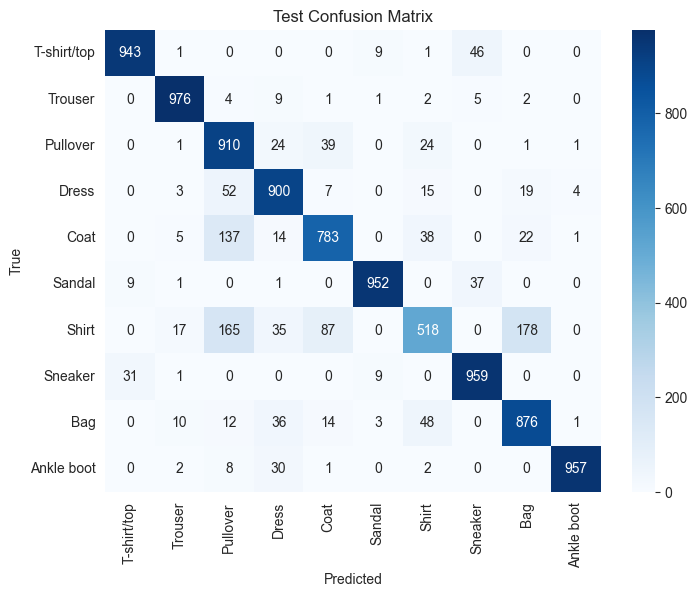

313/313 [==============================] - 1s 2ms/step
Test Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.96      0.94      0.95      1000
     Trouser       0.96      0.98      0.97      1000
    Pullover       0.71      0.91      0.80      1000
       Dress       0.86      0.90      0.88      1000
        Coat       0.84      0.78      0.81      1000
      Sandal       0.98      0.95      0.96      1000
       Shirt       0.80      0.52      0.63      1000
     Sneaker       0.92      0.96      0.94      1000
         Bag       0.80      0.88      0.84      1000
  Ankle boot       0.99      0.96      0.97      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



In [111]:
image_classifier.plot_confusion_matrix('test')
image_classifier.show_results('test')

## Prediction

In [115]:
def plot_sample_with_prediction(model1, x_test, y_test, classes, sample_index):
    sample = x_test[sample_index]
    sample = np.expand_dims(sample, 0)
    pred_prob = model.predict(sample)
    y_pred = np.argmax(pred_prob)
    y_true = np.argmax(y_test[sample_index])

    # Plot the sample image
    plt.figure(figsize=(4, 4))
    plt.imshow(sample[0])
    plt.title(f'Actual: {classes[y_true]}\nPredicted: {classes[y_pred]}')
    plt.axis('off')
    plt.show()

# Example usage:
# sample_index = 13  # Replace with the index of the sample you want to visualize
# plot_sample_with_prediction(model1, x_test, y_test, classes, sample_index)


1/1 [==============================] - 0s 199ms/step


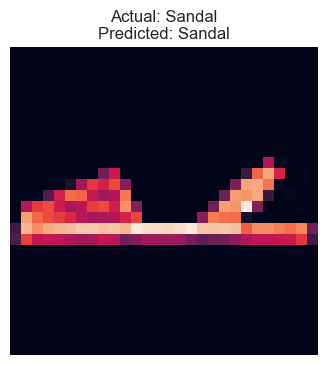

In [116]:
plot_sample_with_prediction(model1, x_test, y_test, classes, 111)

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___